<a href="https://colab.research.google.com/github/MrSimple07/MachineLearning_Practice/blob/main/Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
digits.data.shape

(1797, 64)

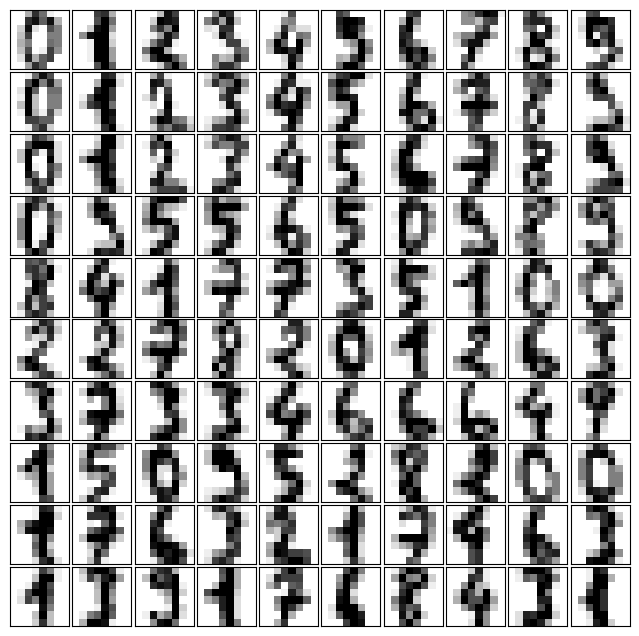

In [ ]:
fig, ax = plt.subplots(10, 10, figsize=(8, 8), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i, axi in enumerate(ax.flat):
    im = axi.imshow(digits.data[i].reshape(8,8), cmap='binary')
    im.set_clim(0, 16)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.99, svd_solver = 'full')
data = pca.fit_transform(digits.data)
data.shape


(1797, 41)

In [ ]:
from sklearn import mixture
import numpy as np
from tqdm.notebook import tqdm

random_state = 17

n_components = np.arange(50,250,10)
gmm_models = [mixture.GaussianMixture(n_components = n, covariance_type = 'full', random_state = random_state) for n in n_components]
aics =[model.fit(data).aic(data) for model in tqdm(gmm_models)]
best_n_components = n_components[np.argmin(aics)]
print(best_n_components)

  0%|          | 0/20 [00:00<?, ?it/s]

180


In [ ]:
final_model = mixture.GaussianMixture(best_n_components, covariance_type = 'full', random_state = random_state)
final_model.fit(data)
print(final_model.converged_)

True


In [ ]:
data_new, _ = final_model.sample(100)
res = data_new[:,0].mean()
print(round(res, 3))

0.101
